## Import libraries

In [10]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV

# settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Prepare and Analysis the Dataset

In [2]:
dataset = pd.read_csv('mexico_covid19.csv')
dataset = dataset[['EDAD', 'SEXO', 'NEUMONIA', 'DIABETES', 'ASMA', 'HIPERTENSION', 'OBESIDAD',
                   'CARDIOVASCULAR', 'OTRO_CASO', 'RESULTADO']]
dataset.rename(
    columns={'EDAD': 'Age', 'SEXO': 'Sex', 'NEUMONIA': 'Pneumonia', 'DIABETES': 'Diabetes', 'ASMA': 'Asthma',
             'HIPERTENSION': 'Hypertension', 'OBESIDAD': 'Obesity', 
             'CARDIOVASCULAR' : 'Cardiovascular', 'OTRO_CASO': 'Contact_diagnosed_person', 'RESULTADO' : 'Result'},
    inplace=True
)
print(dataset.columns)
dataset

Index(['Age', 'Sex', 'Pneumonia', 'Diabetes', 'Asthma', 'Hypertension',
       'Obesity', 'Cardiovascular', 'Contact_diagnosed_person', 'Result'],
      dtype='object')


,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
0,74,2,2,1,2,1,1,2,2,2
1,71,1,2,1,2,1,1,2,99,2
2,50,2,1,2,2,2,2,2,99,1
3,25,1,2,2,2,2,1,2,99,1
4,28,1,2,2,2,2,2,2,99,2
...,...,...,...,...,...,...,...,...,...,...
263002,39,2,2,2,2,2,2,2,1,1
263003,53,1,1,1,2,2,1,2,99,1
263004,65,1,2,1,2,1,2,2,99,1
263005,71,2,1,2,2,1,2,2,2,1


In [3]:
dataset.describe()

,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,42.591627,1.510682,1.842993,2.239712,2.300711,2.174185,2.184763,2.324980,32.283764,1.609672
std,16.903824,0.499887,0.798979,5.958047,5.682309,5.745114,5.817362,5.796086,45.350310,0.487825
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,53.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000
max,120.000000,2.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Age                       263007 non-null  int64
 1   Sex                       263007 non-null  int64
 2   Pneumonia                 263007 non-null  int64
 3   Diabetes                  263007 non-null  int64
 4   Asthma                    263007 non-null  int64
 5   Hypertension              263007 non-null  int64
 6   Obesity                   263007 non-null  int64
 7   Cardiovascular            263007 non-null  int64
 8   Contact_diagnosed_person  263007 non-null  int64
 9   Result                    263007 non-null  int64
dtypes: int64(10)
memory usage: 20.1 MB


In [5]:
dataset['Result'] = dataset['Result'].astype(str).str.replace('2','0') # negative
dataset['Result'] = dataset['Result'].astype(str).str.replace('1','1') # positive
dataset = dataset[dataset['Age'] <= 18].reset_index(drop=True)
dataset = dataset.apply(pd.to_numeric, errors='ignore')

dataset

,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
0,8,2,2,2,2,2,2,2,99,0
1,15,2,2,2,2,2,1,2,99,0
2,1,2,2,2,2,2,2,2,99,0
3,13,1,2,2,2,2,2,2,99,0
4,2,1,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
13702,6,1,2,2,2,2,2,2,1,1
13703,13,1,2,2,2,2,2,2,1,1
13704,16,1,2,2,2,2,2,2,99,1
13705,10,2,2,2,2,2,2,2,99,0


## Exploratory

In [6]:
dataset['Result'].value_counts(normalize=True) * 100

0    82.24265
1    17.75735
Name: Result, dtype: float64

In [7]:
categorical_columns = dataset.drop(['Age', 'Result'], axis='columns').columns
categorical_columns

Index(['Sex', 'Pneumonia', 'Diabetes', 'Asthma', 'Hypertension', 'Obesity',
       'Cardiovascular', 'Contact_diagnosed_person'],
      dtype='object')

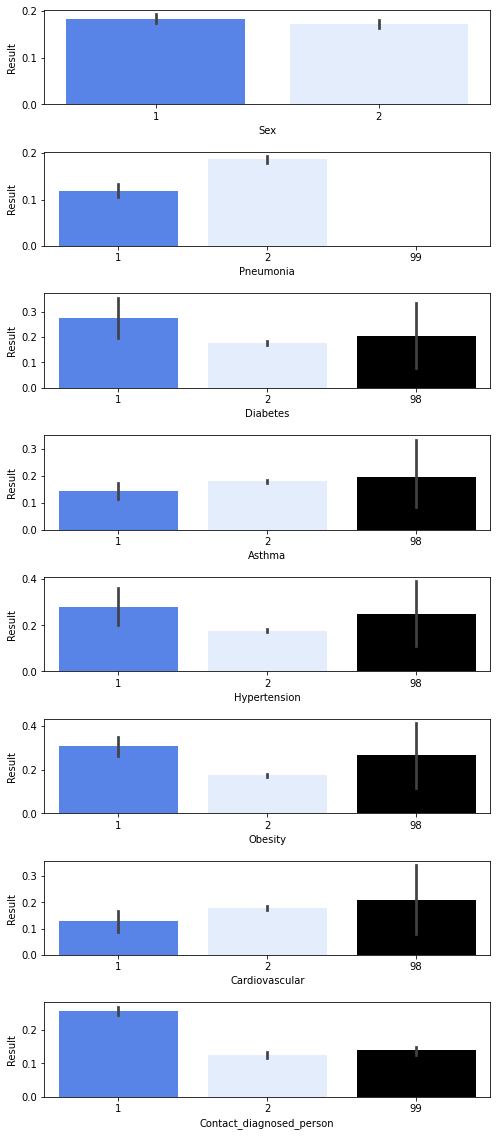

In [19]:
fig = plt.figure(figsize=(8,20))
fig.subplots_adjust(hspace = 0.5)
row = 1
for column in categorical_columns:
    ax = fig.add_subplot(len(categorical_columns),1,row)
    ax = sns.barplot(x=column, y="Result", data=dataset, palette=['#407BFF', '#E0ECFF', 'black'])
    row += 1
    
plt.savefig("01_barplots for categorical columns.png", transparent=True, dpi=200)
plt.show()

In [9]:
plt.figure(figsize=(12, 8))

sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
plt.legend()

ValueError: Could not interpret input ''

# Train models

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Result', axis=1), 
                                                    dataset['Result'], 
                                                    test_size=0.2,
                                                    stratify=dataset['Result'],
                                                    random_state=42)